<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/Food_In_VietNam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
folder = '/content/drive/MyDrive/MonAnScale'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('banhcan'):
    output = 0
  elif file.startswith('pho'):
    output = 1
  elif file.startswith('banhmi'):
    output = 2
  elif file.startswith('bundau'):
    output = 3
  elif file.startswith('banhxeo'):
    output = 4
  elif file.startswith('banhpia'):
    output = 5
  elif file.startswith('caolau'):
    output = 6
  elif file.startswith('cakho'):
    output = 7 
  elif file.startswith('banhtrangnuong'):
    output = 8 
  elif file.startswith('nemchua'):
    output = 9   
  else:
    continue
  photo = load_img(folder + '/' + file, target_size=(30, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('photos.npy', photos)
save('labels.npy', labels)


In [3]:
!cp photos.npy "/content/drive/MyDrive/NHANDIENMONAN"
!cp labels.npy "/content/drive/MyDrive/NHANDIENMONAN"

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
photos = np.load('/content/drive/MyDrive/NHANDIENMONAN/photos.npy')
labels = np.load('/content/drive/MyDrive/NHANDIENMONAN/labels.npy')

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3)

In [5]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (609, 30, 40, 3)
x_test shape:  (261, 30, 40, 3)
y_train shape:  (609,)
y_test shape:  (261,)


In [6]:
x_train = x_train.reshape(609, 30, 40, 3)
x_test = x_test.reshape(261, 30, 40, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
(y_train.shape),(y_test.shape)


((609, 10), (261, 10))

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout
model = Sequential()
#training data to recognize different faces, remember to use LeakyReLU, Dropout, Normalization
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(30,40,3),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(1000,activation='linear'))
model.add(Dense(500,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                  

In [16]:
#compile stop when the accuracy stop increasing
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, callbacks=[early_stopping])

Epoch 1/30
20/20 [==============================] - 4s 129ms/step - loss: 0.2320 - accuracy: 0.9146 - val_loss: 3.5380 - val_accuracy: 0.4215
Epoch 2/30
20/20 [==============================] - 3s 173ms/step - loss: 0.0729 - accuracy: 0.9721 - val_loss: 4.7491 - val_accuracy: 0.3870
Epoch 3/30
20/20 [==============================] - 5s 228ms/step - loss: 0.0720 - accuracy: 0.9803 - val_loss: 5.1213 - val_accuracy: 0.3985
Epoch 4/30
20/20 [==============================] - 3s 145ms/step - loss: 0.0547 - accuracy: 0.9787 - val_loss: 4.5354 - val_accuracy: 0.3985
Epoch 5/30
20/20 [==============================] - 2s 125ms/step - loss: 0.0264 - accuracy: 0.9934 - val_loss: 4.6966 - val_accuracy: 0.4215
Epoch 6/30
20/20 [==============================] - 2s 114ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 4.9669 - val_accuracy: 0.4061
Epoch 7/30
20/20 [==============================] - 3s 169ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 5.0243 - val_accuracy: 0.4100
Epoch 

In [17]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

9/9 [==============================] - 0s 26ms/step - loss: 5.1041 - accuracy: 0.4023
Test loss: 5.1040778160095215
Test accuracy: 0.40229883790016174


In [18]:
model.save('/content/drive/MyDrive/FoodVietNam.hs5')

In [20]:
labels = ['bánh căn', 'phở', 'bánh mì', 'bún đậu', 'bánh xèo', 'bánh pía', 'cao lầu', 'cá kho', 'bánh tráng nướng', 'nem chua']

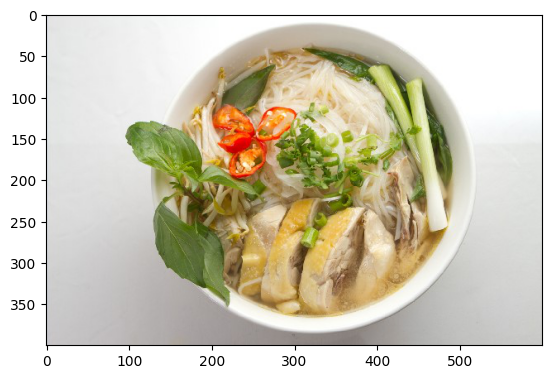

In [22]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/MonAn/Pho (113).jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 437ms/step
phở


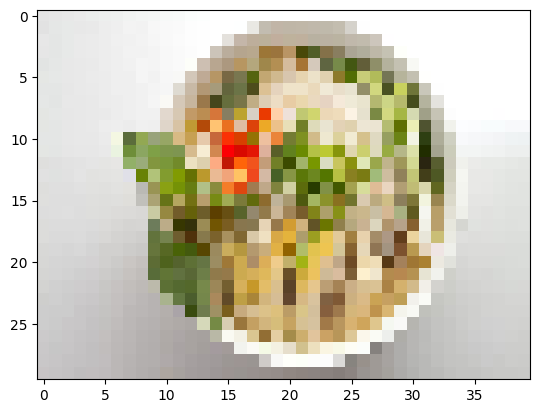

In [23]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/MonAn/Pho (113).jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

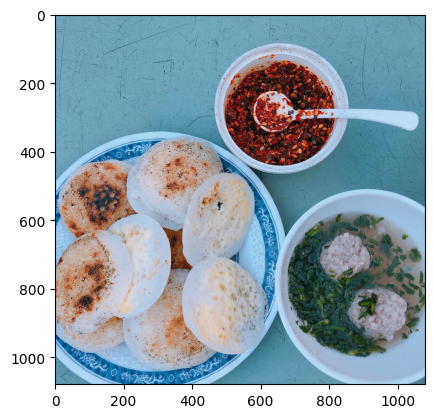

In [26]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/MonAn/banhcan (418).jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 29ms/step
bánh căn


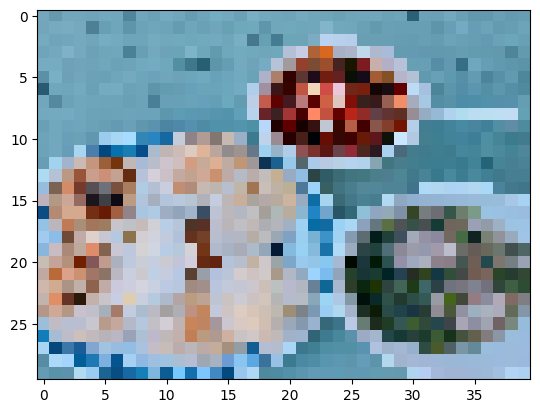

In [27]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/MonAn/banhcan (418).jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

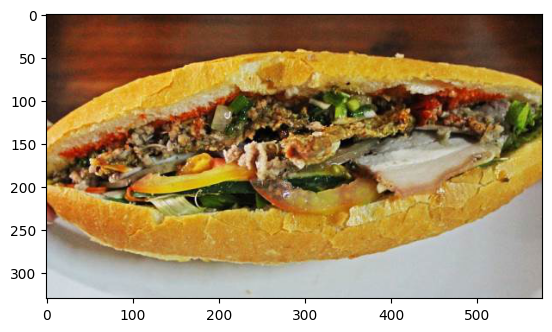

In [29]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/MonAn/Bản sao của banhmi (26).jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 80ms/step
bánh mì


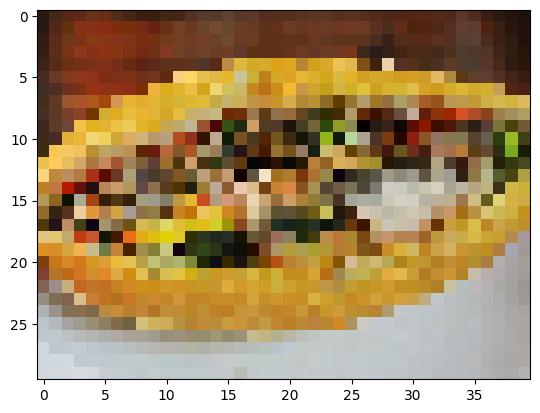

In [30]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/MonAn/Bản sao của banhmi (26).jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)